# Example 5.3 Monte Carlo simulations of wind speeds

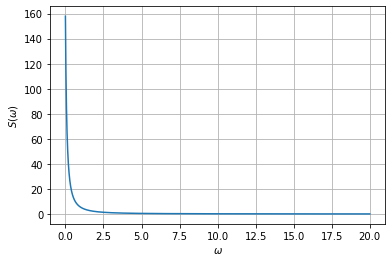

In [33]:
# The auto spectral density of the u-comp according to N400
import numpy as np
from matplotlib import pyplot as plt
w = np.linspace(0,20,10000);
z=50.0; #Height above ground,
z1=10.0;  #Reference height
L1=100.0;  #Reference integral length scale z1=10; L1=100;
xLu=L1*(z/z1)**0.3; # Integral length scale
Au=6.8/2/np.pi; # Constant in the auto-spectral density
V=40;   #Mean wind velocity
Iu=0.15;# Turbulence intensity
Su=np.zeros(w.shape[0])
for k in range(w.shape[0]):
    Su[k]=(Iu*V)**2*Au*xLu/V/((1+1.5*Au*w[k]*xLu/V)**(5.0/3.0));
    
plt.figure()    
plt.plot(w,Su,'-')    
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$');
plt.grid()

(0, 60)

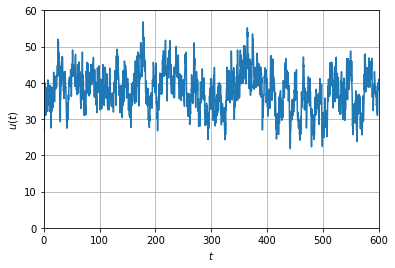

In [31]:
domega = w[1]-w[0]
phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
c = (2*Su*domega)**0.5*np.exp(1j*phi) # The complex amplitude inclusing the phase angle
xifft = np.real(np.fft.ifft(c)*w.shape[0]) # The ifft
tifft = np.linspace(0,2*np.pi/domega,w.shape[0]) # time axis
plt.figure()
plt.plot(tifft,V+xifft)
plt.xlim((0,600));
plt.ylabel(r'$u(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.ylim(0, 60)